In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import torch
from torch import tensor

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import GridSearchCV

import logomaker

from modules.svm import *

In [2]:
train_df = pd.read_csv('ctcf_ml_datasets/train.tsv', sep='\t', header=None)
train_df

,0,1,2,3,4
0,CTCCTCAGTTTCTCTGTGCAGCACCAGGTGGCAGCAGAGGTCAGCA...,1,chr1,267981,268031
1,CCCTCCCGCGGCTCCGGAGCCGGCTGCCACCAGGGGGCGCGCCCGC...,1,chr1,869894,869944
2,CACTCCGCCACCAGGGGGCGCCACAGCTCCTCGCGCCGCCGCCTCC...,1,chr1,904763,904813
3,TCCTGCTTGGGGCAGCGTGGAGGCCAGCGGAGGAACTGCAGGAGCC...,1,chr1,913001,913051
4,TCCTCCCTCTGGCGGCGGGAGGcaggctccagcctcagcccagcGG...,1,chr1,921192,921242
...,...,...,...,...,...
3782,GGACACAGAGAATCCGTCTCCATTTCCAACCCAGGTGCAGGGCTCT...,0,chr19,2950087,2950137
3783,aacacggtgaaaccctgtctctactaaaaatacaaaacttagctgg...,0,chr19,2952237,2952287
3784,gctctttgggaggccaaggtgggaggattgcttgagctcaggagtt...,0,chr19,2955514,2955564
3785,agctgggattgcaggcacgtgccaccacgctcagctaatttttgta...,0,chr19,2957664,2957714


In [3]:
test_df = pd.read_csv('ctcf_ml_datasets/test.tsv', sep='\t', header=None)
test_df

,0,1,2,3,4
0,GGCCTGCAAAATATCCTGTAACTCCTCTAGAGGGTGCTCACTAGCA...,1,chr20,209112,209162
1,GTGCCAGTCTCTACCGCCATCTGCCGGCAGCACTCGGTACACCCGC...,1,chr20,267130,267180
2,GCCAGCGTCTCGGTCTCCAAGGAAACGCGACGCCGCCTACCGAGCG...,1,chr20,290750,290800
3,TGGGGTCTCTGGGGCCACCTAGTGGCTAAGAGGAGTAGAACCAAGG...,1,chr20,330740,330790
4,gAGGCGTCATCTCTCTTCTGTACCACTAGAGGGAGCTCTGATGCAG...,1,chr20,354618,354668
...,...,...,...,...,...
808,TTTTCAAGGAAACTAGGTTCCTGCCAAATTTTGAATCTGGACAATA...,0,chrX,14529939,14529989
809,GAAATGGATGCTAAAGTCATCAACTAATAAAGGAGTACAACTAATA...,0,chrX,14696569,14696619
810,ccAAGGCAATATGTCATCTCTTTAATTTCCTACTGAGAAACTGACC...,0,chrX,14698719,14698769
811,TGCAAGTTTATCAAGTGAATCACACCCCAGAAGCCCTGTCAAGGCT...,0,chrX,15142403,15142453


In [4]:
# check gc content
gc_pos, gc_neg = [],[]
for seq in train_df[train_df[1]==1][0]: gc_pos.append(gc_content(seq))
for seq in train_df[train_df[1]==0][0]: gc_neg.append(gc_content(seq))
len(gc_pos), len(gc_neg)

(1900, 1887)

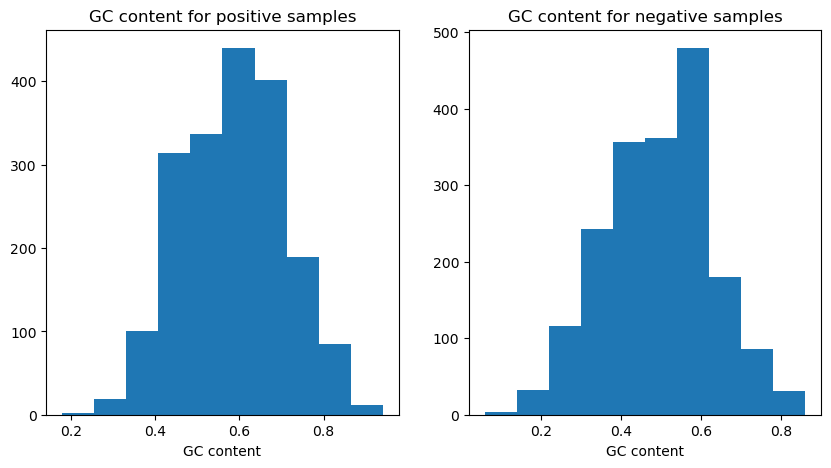

In [5]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
axs[0].hist(gc_pos)
axs[0].set_xlabel('GC content')
axs[0].set_title('GC content for positive samples');

axs[1].hist(gc_neg)
axs[1].set_xlabel('GC content')
axs[1].set_title('GC content for negative samples');

In [6]:
x_train, y_train = preprocess(train_df)
x_test, y_test = preprocess(test_df)

In [7]:
x_train.shape, y_train.shape, y_train[:10]

(torch.Size([3787, 200]),
 torch.Size([3787]),
 tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 0]))

In [8]:
x_test.shape, y_test.shape, y_test[:10]

(torch.Size([813, 200]),
 torch.Size([813]),
 tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [10]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
LinearSVC(max_iter=5000, dual=False),
param_grid, 
scoring="average_precision",
cv=5)

In [11]:
grid.fit(x_train, y_train)

/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to

/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_base.

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='average_precision')

In [12]:
grid.best_score_, grid.best_params_

(0.6769575535768102, {'C': 0.01})

In [13]:
x_test = scaler.transform(x_test)

In [14]:
get_metrics(grid, x_test, y_test)

Accuracy: 0.6162361623616236
AUROC: 0.6775
AUPRC: 0.6370290554883904


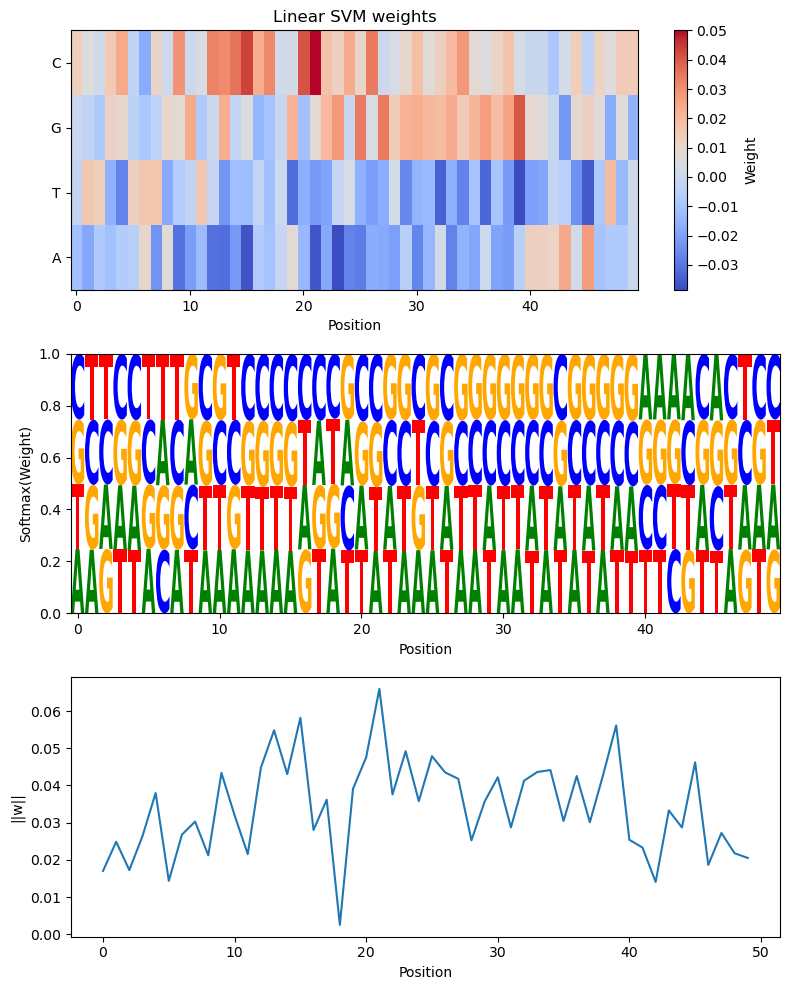

In [15]:
motif = get_motif(grid)
vis_motif(motif)

In [16]:
w = motif
w_rc = w[[1,0,3,2], ::-1]

np.corrcoef(w.flatten(), w_rc.flatten())[0,1]

0.5078364163314081

## RC augmentation during training

In [17]:
x_train, y_train = aug_preprocess(train_df)
x_train.shape, y_train.shape, y_train[:10]

(torch.Size([7574, 200]),
 torch.Size([7574]),
 tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [19]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
LinearSVC(max_iter=5000, dual=False),
param_grid, 
scoring="average_precision",
cv=5)

In [20]:
grid.fit(x_train, y_train)

/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to

/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/layaasiv/miniconda3/envs/tfbs-cls/lib/python3.9/site-packages/sklearn/svm/_base.

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='average_precision')

In [21]:
grid.best_score_, grid.best_params_

(0.682231049902406, {'C': 0.01})

In [22]:
x_test, y_test = aug_preprocess(test_df)
x_test = scaler.transform(x_test)

In [23]:
get_metrics(grid, x_test, y_test)

Accuracy: 0.6322263222632226
AUROC: 0.6918099273607747
AUPRC: 0.6578650370453399


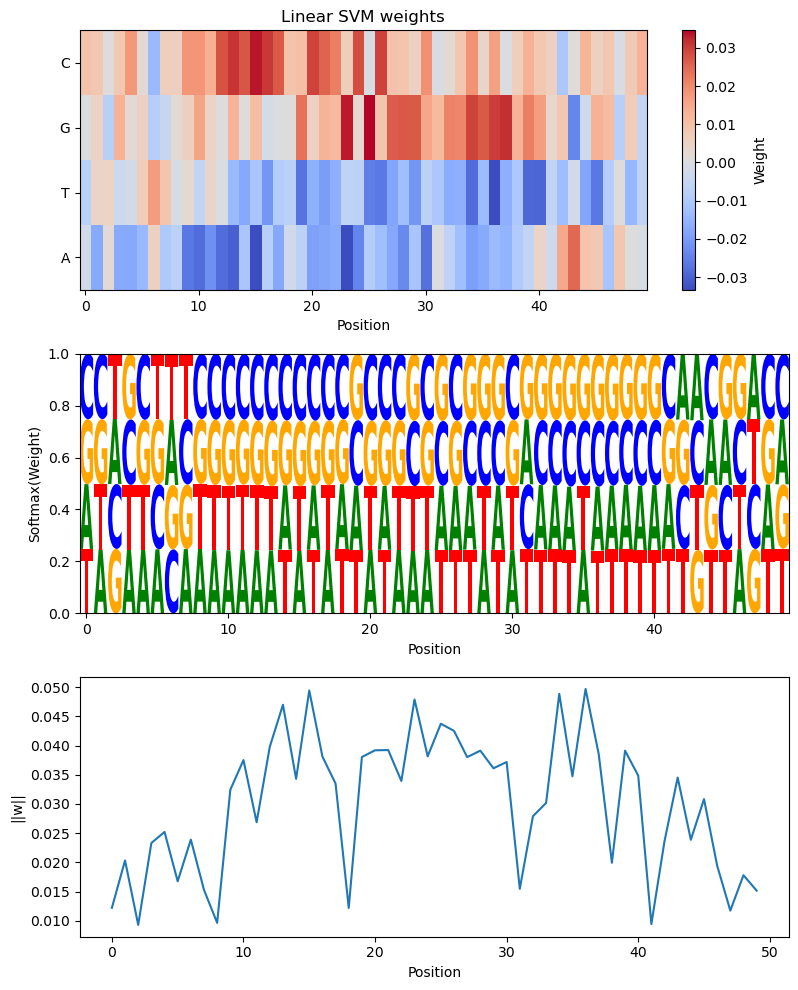

In [24]:
motif = get_motif(grid)
vis_motif(motif)

In [25]:
w = motif
w_rc = w[[1,0,3,2], ::-1]  # adjust mapping for A,T,G,C

np.corrcoef(w.flatten(), w_rc.flatten())[0,1]

0.9366896713634303

This checks whether the SVM has learned strand-invariant sequence features by correlating its weights with their reverse-complement transformation.

## Determining motif length quantitatively

In [31]:
l2_motif = np.linalg.norm(motif, axis=0)

In [36]:
(l2_motif >= 0.5*l2_motif.max()).sum()

32

In [39]:
sorted_pos = np.argsort(l2_motif)[::-1]
sorted_imp = l2_motif[sorted_pos]

cum_imp = np.cumsum(sorted_imp)
L_80 = np.searchsorted(cum_imp, 0.8 * cum_imp[-1]) + 1
L_80

32

## Trying shuffled positive sequences as negatives

In [40]:
train_df = pd.read_csv('ctcf_ml_datasets/train_dinuc.tsv', sep="\t", header=None)
train_df

,0,1,2,3,4
0,CTCCTCAGTTTCTCTGTGCAGCACCAGGTGGCAGCAGAGGTCAGCA...,1,chr1,267981,268031
1,CCCTCCCGCGGCTCCGGAGCCGGCTGCCACCAGGGGGCGCGCCCGC...,1,chr1,869894,869944
2,CACTCCGCCACCAGGGGGCGCCACAGCTCCTCGCGCCGCCGCCTCC...,1,chr1,904763,904813
3,TCCTGCTTGGGGCAGCGTGGAGGCCAGCGGAGGAACTGCAGGAGCC...,1,chr1,913001,913051
4,TCCTCCCTCTGGCGGCGGGAGGcaggctccagcctcagcccagcGG...,1,chr1,921192,921242
...,...,...,...,...,...
3795,GTGCACACAGTGTGCGGCTGTGGTGACGCCCTTATTCTCCTCCAGA...,0,chr19,2951162,2951212
3796,atgaaCACAGGGCAGACCACTATGACCATGCGTCAATTTTTGGAAA...,0,chr19,2956589,2956639
3797,CATCAATTCCCTACATTAGATTGACAAGGAGGCTGGTAGGTTATAC...,0,chr19,2962235,2962285
3798,GGTTTGGAGGGGCGGAGAGTCCAGGGGCCCTCCAGCTGCCCGATCC...,0,chr19,3057552,3057602


In [41]:
test_df = pd.read_csv('ctcf_ml_datasets/test_dinuc.tsv', sep="\t", header=None)
test_df

,0,1,2,3,4
0,GGCCTGCAAAATATCCTGTAACTCCTCTAGAGGGTGCTCACTAGCA...,1,chr20,209112,209162
1,GTGCCAGTCTCTACCGCCATCTGCCGGCAGCACTCGGTACACCCGC...,1,chr20,267130,267180
2,GCCAGCGTCTCGGTCTCCAAGGAAACGCGACGCCGCCTACCGAGCG...,1,chr20,290750,290800
3,TGGGGTCTCTGGGGCCACCTAGTGGCTAAGAGGAGTAGAACCAAGG...,1,chr20,330740,330790
4,gAGGCGTCATCTCTCTTCTGTACCACTAGAGGGAGCTCTGATGCAG...,1,chr20,354618,354668
...,...,...,...,...,...
795,AAGCCAAGGTGTAGCACCCCGGGTCAATATGCTGATAACCAATTGC...,0,chrX,14039481,14039531
796,TCAGACGTGCATGGCACCAGTGAGCCGCAGGTGAACAGATGTTCTG...,0,chrX,14095821,14095871
797,CTCCCGCTGTTTGAGAATTGGAGCCATGAACAGGAGCAAAGAAGGC...,0,chrX,14528864,14528914
798,ACCTTTACAGGCTGTCTGCACCCTCCTATGTGATACTGCCTGGGCA...,0,chrX,14697644,14697694


In [44]:
x_train, y_train = preprocess(train_df)
x_train.shape, y_train.shape, y_train[:10]

(torch.Size([3800, 200]),
 torch.Size([3800]),
 tensor([1, 0, 1, 1, 0, 1, 0, 1, 0, 1]))

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [46]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
LinearSVC(max_iter=5000, dual=False),
param_grid, 
scoring="average_precision",
cv=5)

In [47]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False, max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='average_precision')

In [48]:
grid.best_score_, grid.best_params_

(0.5484928288901461, {'C': 0.01})

In [49]:
x_test, y_test = aug_preprocess(test_df)
x_test = scaler.transform(x_test)

In [50]:
get_metrics(grid, x_test, y_test)

Accuracy: 0.515625
AUROC: 0.5177296875
AUPRC: 0.5245863218931528


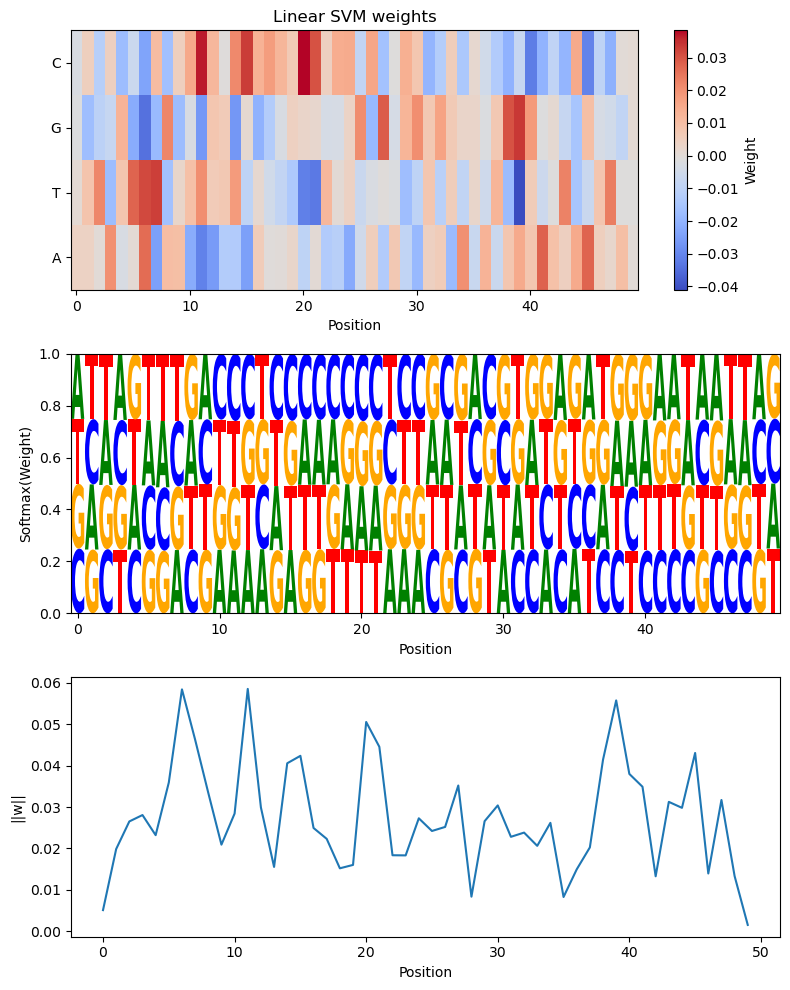

In [51]:
motif = get_motif(grid)
vis_motif(motif)

In [2]:
[0]*10 + [1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]